# **Importing Necessary Modules**

In [126]:
import pandas as pd
from pandas import json_normalize
import datetime as dt
import matplotlib.pyplot as plt

Defining Schema and Reading csv file into our movies dataframe

In [127]:
columns=['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language','original_title','overview','popularity',
         'poster_path','production_companies','production_countries','release_date','runtime','spoken_languages','status','tagline','title','Keywords','cast',
         'crew','revenue']

movies_train=pd.read_csv('/content/box_office_train.csv',escapechar='\\',names=columns,skiprows=1)

# checking first 5 rows data to understand what values each column has 
print(movies_train.head(5))
# checking the shape of our dataframe
print(movies_train.shape)
#checking the dataype of each column
print(movies_train.dtypes)

   id                              belongs_to_collection    budget  \
0   0                                                NaN   3000000   
1   1                                                NaN         0   
2   2  [{'id': 416491, 'name': 'Major Korenev Trilogy...   5000000   
3   3                                                NaN         0   
4   4  [{'id': 112636, 'name': 'The Blues Brothers Co...  28000000   

                                              genres homepage    imdb_id  \
0                    [{'id': 37, 'name': 'Western'}]      NaN  tt0040724   
1                [{'id': 99, 'name': 'Documentary'}]      NaN  tt0099028   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...      NaN  tt0325005   
3  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  tt0101595   
4  [{'id': 10402, 'name': 'Music'}, {'id': 28, 'n...      NaN  tt0118747   

  original_language       original_title  \
0                en            Red River   
1                en       American

# DATA WRANGLING
This step involves data cleaning and data transformation.
ie converting columns into more suitable form such that we can do analysis and train our ML model on it.

In [128]:
import ast
from ast import literal_eval
print(movies_train.genres)
#since this column contains a list of dictionaries we need to normalize this column.

#filling missing values with empty list so that we cant get an error or exception while decoding this
movies_train['genres'].fillna("[]",inplace=True)

#applying literal_eval function so that python understands the containers present in the string ie list,dictionaries
movies_train['genres']=movies_train['genres'].apply(ast.literal_eval)

#finally applying json_normalize to flatten our genre column
genres_df = json_normalize(movies_train['genres'])
print(genres_df)

#after printing we get 7 columns which means at max 7 dictionaries are present in one record which basically  means we have at max 7 genres present for a movie ,
#so taking all the genre names and storing them in separate column

for col in range(0,7):
    base_name="genre"
    genres_df = genres_df.rename(columns={col: base_name+str(col+1)})
    genres_df[base_name+str(col+1)] = genres_df[base_name+str(col+1)].apply(lambda x: x['name'] if x is not None else None)

#creating a new column 'genre_count' which basically represent total number of genres a movie belongs to
genres_df['genre_count']=genres_df.notna().sum(axis=1)


print(genres_df['genre_count'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95]))
#the result of describe shows that 95% of the movies have 4 genres so only taking genre1 to genre4 column along with genre_count

genres_df=genres_df[['genre1','genre2','genre3','genre4','genre_count']]
genres_df['genre_count'].fillna(0.0,inplace=True)


#since poster column stores the url of the poster its of no use in our usecase as we cant do any processing over it so coverting it into a numeric column containing 0 and 1
#0 means poster not present and 1 means poster present
movies_train['is_poster_present']=movies_train['poster_path'].apply(lambda x:1 if x is not None else 0)


# Following the same procedure for production_countries and production_companies column (same as done for genres column)
movies_train['production_countries'].fillna("[]",inplace=True)
movies_train['production_countries']=movies_train['production_countries'].apply(ast.literal_eval)
production_cntry_df = json_normalize(movies_train['production_countries'])

for col in range(0,8):
    base_name="production_country"
    production_cntry_df = production_cntry_df.rename(columns={col: base_name+str(col+1)})
    production_cntry_df[base_name+str(col+1)] = production_cntry_df[base_name+str(col+1)].apply(lambda x: x['name'] if x is not None else None)

production_cntry_df['production_countries_count']=production_cntry_df.notna().sum(axis=1)
print(production_cntry_df['production_countries_count'].describe(percentiles=[0.1,0.50,0.90,0.95]))
production_cntry_df=production_cntry_df[['production_country1','production_country2','production_countries_count']]


movies_train['production_companies'].fillna("[]",inplace=True)
movies_train['production_companies']=movies_train['production_companies'].apply(ast.literal_eval)
production_company_df = json_normalize(movies_train['production_companies'])

for col in range(0,8):
    base_name="production_company"
    production_company_df = production_company_df.rename(columns={col: base_name+str(col+1)})
    production_company_df[base_name+str(col+1)] = production_company_df[base_name+str(col+1)].apply(lambda x: x['name'] if x is not None else None)

production_company_df['production_companies_count']=production_company_df.notna().sum(axis=1)
# print(production_company_df['production_companies_count'].describe(percentiles=[0.1,0.50,0.90,0.95]))
production_company_df=production_company_df[['production_company1','production_company2','production_company3','production_companies_count']]



0                         [{'id': 37, 'name': 'Western'}]
1                     [{'id': 99, 'name': 'Documentary'}]
2       [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
3       [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
4       [{'id': 10402, 'name': 'Music'}, {'id': 28, 'n...
                              ...                        
2395    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
2396    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2397    [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
2398    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2399    [{'id': 35, 'name': 'Comedy'}, {'id': 10769, '...
Name: genres, Length: 2400, dtype: object
                                      0                                 1  \
0         {'id': 37, 'name': 'Western'}                              None   
1     {'id': 99, 'name': 'Documentary'}                              None   
2          {'id': 28, 'name': 'Action'}       {'id': 80, 'name': 'Crime'}   
3           

In [129]:
#converting release date column to python date time type and extracting only year from the date
movies_train['release_date'] = pd.to_datetime(movies_train['release_date'], errors='coerce')
movies_train['release_year']=movies_train['release_date'].dt.year
movies_train.drop('release_date',axis=1,inplace=True)

#creating a new column overview_len which basically counts the characters present in overview_column as more the count of characters more will be the movie description
movies_train['overview'].fillna("",inplace=True)

movies_train['overview_len']=movies_train['overview'].apply(lambda x:len(str(x)) if x is not None else 0)

# checking sample data of some columns
print(movies_train['crew'][0:1][0])
print(movies_train['cast'][0:1][0])

[{'credit_id': '52fe4384c3a36847f805a485', 'department': 'Sound', 'gender': 2, 'id': 4082, 'job': 'Music', 'name': 'Dimitri Tiomkin', 'profile_path': None}, {'credit_id': '52fe4384c3a36847f805a48b', 'department': 'Camera', 'gender': 2, 'id': 4308, 'job': 'Director of Photography', 'name': 'Russell Harlan', 'profile_path': '/yDYlBTYPEMARI8sKwPjnleqQvFL.jpg'}, {'credit_id': '52fe4384c3a36847f805a461', 'department': 'Directing', 'gender': 0, 'id': 11435, 'job': 'Director', 'name': 'Howard Hawks', 'profile_path': '/yekSHa7JRzGMg0M7X4HP530GeyV.jpg'}, {'credit_id': '52fe4384c3a36847f805a479', 'department': 'Production', 'gender': 0, 'id': 11435, 'job': 'Producer', 'name': 'Howard Hawks', 'profile_path': '/yekSHa7JRzGMg0M7X4HP530GeyV.jpg'}, {'credit_id': '52fe4384c3a36847f805a47f', 'department': 'Production', 'gender': 2, 'id': 10535, 'job': 'Executive Producer', 'name': 'Charles K. Feldman', 'profile_path': None}, {'credit_id': '52fe4384c3a36847f805a491', 'department': 'Editing', 'gender': 2

In [130]:
# Creating a common function to calculate various important metrics for a movie and applying this function on all those columns which have same Structure
# This function check firstly whether each element passed is None or if it is any float value then return 0 as we dont have any list of dictionaries entries to process 
# in this case next we are taking a counter variable and initializing it to 0 then i loop through this string and if i encounter any { character , will increment the counter 
# by 1 as it is my valid dict object (corresponds to one entry) , as our column contains list of dictionaries
def get_KPI_count(record):
    if record is None or isinstance(record,float):
        return 0
    count = 0
    for ch in record:
        if ch=='{':
            count += 1
    return count

In [131]:
movies_train['crew_count']=movies_train['crew'].apply(get_KPI_count)
movies_train['cast_count'] = movies_train['cast'].apply(get_KPI_count)
movies_train['keywords_count']=movies_train['Keywords'].apply(get_KPI_count)
movies_train['spoken_languages_count']=movies_train['spoken_languages'].apply(get_KPI_count)

#creating title length column using title column
movies_train['title_length']=movies_train['original_title'].apply(lambda x:len(x) if x is not None else 0)
print(movies_train.columns)

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'is_poster_present', 'release_year', 'overview_len', 'crew_count',
       'cast_count', 'keywords_count', 'spoken_languages_count',
       'title_length'],
      dtype='object')


In [132]:
# Removing unnecessary columns from the dataframe which are of no use
movies_train.drop(['imdb_id','production_countries','overview','genres','homepage','original_title','production_companies','spoken_languages','cast','crew','Keywords','belongs_to_collection','poster_path'],axis=1,inplace=True)


In [133]:
# Joining intermediate dataframes created with the original dataframe

movies_train=movies_train.join(production_company_df)
movies_train=movies_train.join(production_cntry_df)
movies_train=movies_train.join(genres_df)
print(movies_train.head(1))

   id   budget original_language  popularity  runtime    status  \
0   0  3000000                en     6.09018    133.0  Released   

                                             tagline      title  revenue  \
0  Big as the men who faced this challenge! Bold ...  Red River  9012000   

   is_poster_present  ...       production_company3  \
0                  1  ...  Charles K. Feldman Group   

   production_companies_count       production_country1  production_country2  \
0                           3  United States of America                 None   

   production_countries_count   genre1  genre2 genre3 genre4 genre_count  
0                           1  Western    None   None   None           1  

[1 rows x 29 columns]


## Exploratory Data Analysis (Data Visualization)

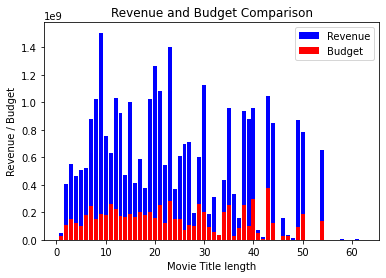

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns


#checking if title_length has any significant relation with the profit(revenue/budget) and also with the revenue generation 
# if it has any significant impact on profit/revenue then we can consider this for our Model 
# create a bar chart
plt.bar(movies_train['title_length'], movies_train['revenue'], color='b')
plt.bar(movies_train['title_length'], movies_train['budget'], color='r')

# add labels and title
plt.xlabel('Movie Title length')
plt.ylabel('Revenue / Budget')
plt.title('Revenue and Budget Comparison')
plt.legend(["Revenue","Budget"])
# show the chart
plt.show()


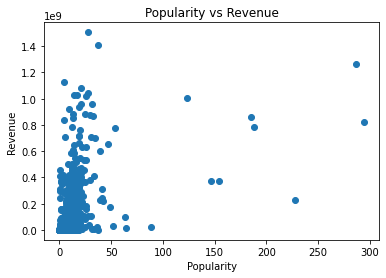

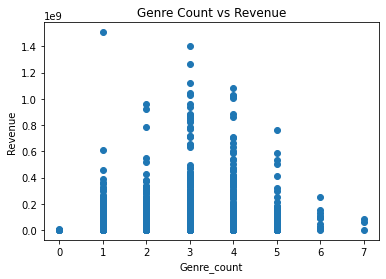

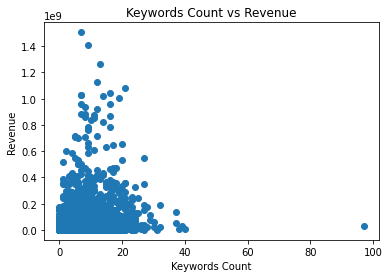

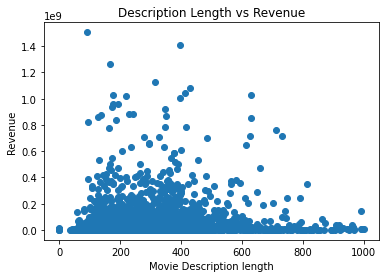

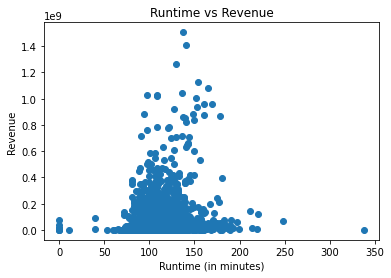

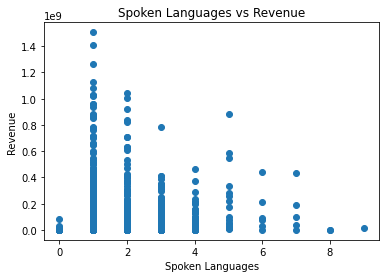

In [135]:

# create a scatter plot of popularity vs revenue
plt.scatter(movies_train['popularity'],movies_train['revenue'])

# add labels and title
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Popularity vs Revenue')

# show the chart
plt.show()


# create a scatter plot of genres count of a movie and revenue
plt.scatter(movies_train['genre_count'],movies_train['revenue'])

# add labels and title
plt.xlabel('Genre_count')
plt.ylabel('Revenue')
plt.title('Genre Count vs Revenue')

# show the chart
plt.show()

#creating a scatter plot of keywords count vs revenue
plt.scatter(movies_train['keywords_count'],movies_train['revenue'])
plt.xlabel('Keywords Count')
plt.ylabel('Revenue')
plt.title('Keywords Count vs Revenue')
plt.show()


plt.scatter(movies_train['overview_len'],movies_train['revenue'])
plt.xlabel('Movie Description length')
plt.ylabel('Revenue')
plt.title('Description Length vs Revenue')
plt.show()


# create a scatter plot of movie runtime vs revenue
plt.scatter(movies_train['runtime'],movies_train['revenue'])

# add labels and title
plt.xlabel('Runtime (in minutes)')
plt.ylabel('Revenue')
plt.title('Runtime vs Revenue')

# show the chart
plt.show()



# create a scatter plot of languages spoken count vs revenue
plt.scatter(movies_train['spoken_languages_count'],movies_train['revenue'])

# add labels and title
plt.xlabel('Spoken Languages')
plt.ylabel('Revenue')
plt.title('Spoken Languages vs Revenue')

# show the chart
plt.show()

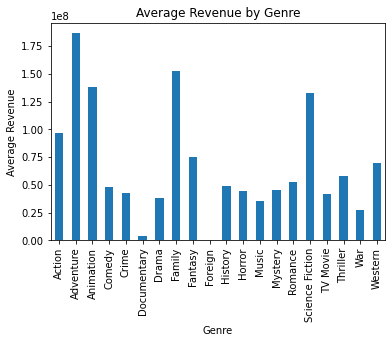

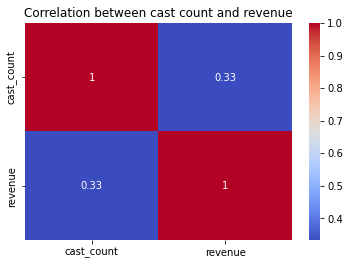

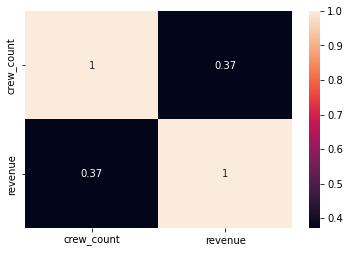

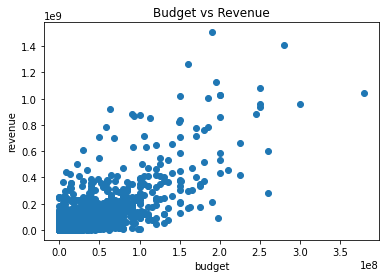

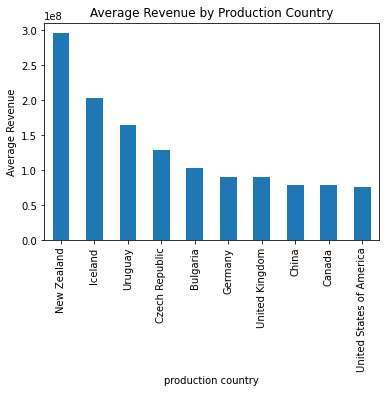

In [136]:
# Group the data by genre and calculate the mean revenue for each group
genre_revenue = movies_train.groupby('genre1')['revenue'].mean()

# Create a bar chart of average revenue by genre1
genre_revenue.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Genre')
plt.show()

#creating a heatmap of cast count and revenue to find correlation between these two
corr = movies_train[['cast_count', 'revenue']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between cast count and revenue')
plt.show()

sns.heatmap(movies_train[['crew_count','revenue']].corr(),annot=True)
plt.show()


# create a scatter plot of budget vs revenue comparison
plt.scatter(movies_train['budget'],movies_train['revenue'])

# add labels and title
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Budget vs Revenue')
plt.show()

# Group the data by production_country and calculate the mean revenue for each group
prd_cntry_revenue = movies_train.groupby('production_country1')['revenue'].mean()
prd_cntry_revenue=prd_cntry_revenue.sort_values(ascending=False).head(10)
prd_cntry_revenue.plot(kind='bar')
plt.xlabel('production country')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Production Country')
plt.show()


From the Above visualizations 
>>we can say that high budget movies seems to be generating high revenue as well but it is not always true as some low budget films also generates good revenue and     profit.
>>Those movies with genre as Adventure, family , Science Fiction and Animation generated more revenue than others.
>> 100-180 minutes movies generates more revenue which seems logical as more duration will make the movie boring and also very short duration doesnt has a good elaborated story .
>> It can also be concluded that movies with less keywords generates more revenue.
>> Also Movies with Small to Medium Description are higher in revenue than those having long descriptions.
>> Also Cast people count and Crew people Count seems to Correlate with revenue with a small amount (~34%)
>> Movies Title Length doesnt have any signifant role in deciding the Revenue.
>> Lesser will be the Spoken languages count in the movie more will be the revenue which seems logical as well.
>> New Zealand is the leading country with the highest Average Revenue.
>> Movies with More Popularity generated good revenue but its not always true as some less popular movies outperformed as well.
>> Also it can be noted that movies with  genre count in the range (2,5) generates more revenue , too many genres will result in less revenue.  

**Choosing only Relevant Columns for Model Training**

In [137]:
train_set=movies_train['budget', 'popularity', 'runtime','id',
      'revenue', 'overview_len', 'crew_count', 'cast_count',
       'keywords_count', 'spoken_languages_count', 'title_length','genre_count']
train_set.dropna(inplace=True)
print(train_set.shape)

(2398, 12)


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


**Preparing Test Data in the same format(in the same way)**

In [141]:
columns=['id','belongs_to_collection','budget','genres','homepage','imdb_id','original_language','original_title','overview','popularity',
         'poster_path','production_companies','production_countries','release_date','runtime','spoken_languages','status','tagline','title','Keywords','cast',
         'crew']

movies_test=pd.read_csv('/content/box_office_test.csv',escapechar='\\',names=columns,skiprows=1)

movies_test['is_poster_present']=movies_test['poster_path'].apply(lambda x:1 if x is not None else 0)
movies_test['release_date'] = pd.to_datetime(movies_test['release_date'], errors='coerce')
movies_test['release_year']=movies_test['release_date'].dt.year
movies_test.drop('release_date',axis=1,inplace=True)

movies_test['overview'].fillna("",inplace=True)
movies_test['overview_len']=movies_test['overview'].apply(lambda x:len(str(x)) if x is not None else 0)
movies_test['crew_count']=movies_test['crew'].apply(get_KPI_count)
movies_test['cast_count'] = movies_test['cast'].apply(get_KPI_count)
movies_test['keywords_count']=movies_test['Keywords'].apply(get_KPI_count)
movies_test['genre_count']=movies_test['genres'].apply(get_KPI_count)

movies_test['spoken_languages_count']=movies_test['spoken_languages'].apply(get_KPI_count)
movies_test['title_length']=movies_test['original_title'].apply(lambda x:len(x) if x is not None else 0)


test_set=movies_test[['budget', 'popularity', 'runtime','id', 'overview_len', 'crew_count', 'cast_count',
       'keywords_count', 'spoken_languages_count', 'title_length','genre_count']]

# MODEL TRAINING : using Linear Regression Model

In [148]:
from sklearn.linear_model import LinearRegression


x_train=train_set.drop('revenue',axis=1)
y_train=train_set['revenue']

x_test=test_set
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns=['predicted_revenue'])
y_pred['id'] = x_test['id']
print(y_pred)
y_pred.to_csv('submission.csv', index=False)

     predicted_revenue   id
0         5.519241e+06    0
1         8.277392e+06    1
2         4.439481e+06    2
3         9.338786e+07    3
4         1.875086e+08    4
..                 ...  ...
595       1.542551e+08  595
596       2.681178e+08  596
597       3.172757e+07  597
598       1.819793e+08  598
599       3.450323e+07  599

[600 rows x 2 columns]
